In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_item = pd.read_csv("../2nd dataset/olist_order_items_dataset.csv")
df_reviews = pd.read_csv("../2nd dataset/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("../2nd dataset/olist_orders_dataset.csv")
df_products = pd.read_csv("../2nd dataset/olist_products_dataset.csv")
df_geolocation = pd.read_csv("../2nd dataset/olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("../2nd dataset/olist_sellers_dataset.csv")
df_order_pay = pd.read_csv("../2nd dataset/olist_order_payments_dataset.csv")
df_customers = pd.read_csv("../2nd dataset/olist_customers_dataset.csv")
df_category = pd.read_csv("../2nd dataset/product_category_name_translation.csv")

In [3]:
df_merge = df_orders.merge(df_item, on='order_id', how='left')
df_merge = df_merge.merge(df_order_pay, on='order_id', how='outer', validate='m:m')
df_merge = df_merge.merge(df_reviews, on='order_id', how='outer')
df_merge = df_merge.merge(df_products, on='product_id', how='outer')
df_merge = df_merge.merge(df_customers, on='customer_id', how='outer')
df_merge = df_merge.merge(df_sellers, on='seller_id', how='outer')

print(df_merge.shape)

(119143, 39)


In [4]:
pd.set_option('display.max_columns', None)
df_merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-12 22:24:16,895.0,21.02,1.0,credit_card,10.0,916.02,f6923b4d17e0f4e87b38cb26c758d3c6,5.0,NaN,NaN,2017-10-08 00:00:00,2017-10-11 21:42:45,eletroportateis,40.0,849.0,2.0,11800.0,40.0,43.0,36.0,3c7e305796add66698959fc7ad176f6b,87502,umuarama,PR,9080.0,santo andre,SP
1,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-24 23:56:20,895.0,21.02,1.0,credit_card,8.0,916.02,2abb25fde5aafe9bc85d031dffb2f4ac,1.0,NaN,"Produto preto, reembalado na caixa de um branc...",2017-10-28 00:00:00,2017-10-28 14:32:42,eletroportateis,40.0,849.0,2.0,11800.0,40.0,43.0,36.0,9de5797cddb92598755a0f76383ddbbb,35490,entre rios de minas,MG,9080.0,santo andre,SP
2,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18 14:49:22,895.0,21.02,1.0,credit_card,4.0,916.02,799c3e3362ac0d09cfa1b39b51647490,5.0,NaN,NaN,2017-10-25 00:00:00,2017-10-25 23:15:15,eletroportateis,40.0,849.0,2.0,11800.0,40.0,43.0,36.0,9915eb9f74b6c11aaf04833f65b00e93,38600,paracatu,MG,9080.0,santo andre,SP
3,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,1.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-09-08 08:25:50,99.0,33.08,1.0,credit_card,2.0,264.16,f402ea966112bd28646760b72d7f677f,5.0,NaN,NaN,2017-09-09 00:00:00,2017-09-09 20:51:47,ferramentas_jardim,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710,sao goncalo,RJ,29156.0,cariacica,ES
4,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,2.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-09-08 08:25:50,99.0,33.08,1.0,credit_card,2.0,264.16,f402ea966112bd28646760b72d7f677f,5.0,NaN,NaN,2017-09-09 00:00:00,2017-09-09 20:51:47,ferramentas_jardim,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710,sao goncalo,RJ,29156.0,cariacica,ES


In [5]:
print("\nMissing values:\n", df_merge.isnull().sum())


Missing values:
 order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
product_category_name 

In [7]:
df_merge.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
count,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,119143.000000,118310.000000
mean,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,35033.451298,24442.410413
std,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,29823.198969,27573.004511
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,6429.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,13660.000000
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58475.000000,27972.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,99730.000000


In [8]:
for column in df_merge.columns:
    unique_values_count = df_merge[column].value_counts()
    print(f"\nColumn: {column}")
    print(unique_values_count)


Column: order_id
order_id
895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
68986e4324f6a21481df4e6e89abcf01    24
                                    ..
723eb8a15a9c1cd6038c3af64f0b0fad     1
6d04ee9620b18893b53a68b7522f2fcd     1
762daee2f96924ae9dd917fee13176a2     1
be844f368fa6d0d3ea9f81f72d668b67     1
2e935fa1d39497aa0ec3f1107fbfb5b8     1
Name: count, Length: 99441, dtype: int64

Column: customer_id
customer_id
270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
86cc80fef09f7f39df4b0dbce48e81cb    24
                                    ..
bce59a361a8800fd7f430a5617ffe165     1
bc648a06d0b0e1a59ce255f42c4949cd     1
bb0edd59cf79a1b2d152639d6ef210a8     1
b4b9a82533213cf286475d51c421640e     1
ffffe8b65bbe3087b653a978c870db99     1
Name: count, Length: 99441, dtype: int64


In [9]:
for column in df_merge.columns:
    unique_values_count = df_merge[column].isnull().sum()
    print(f"\nColumn: {column}")
    print(unique_values_count)


Column: order_id
0

Column: customer_id
0

Column: order_status
0

Column: order_purchase_timestamp
0

Column: order_approved_at
177

Column: order_delivered_carrier_date
2086

Column: order_delivered_customer_date
3421

Column: order_estimated_delivery_date
0

Column: order_item_id
833

Column: product_id
833

Column: seller_id
833

Column: shipping_limit_date
833

Column: price
833

Column: freight_value
833

Column: payment_sequential
3

Column: payment_type
3

Column: payment_installments
3

Column: payment_value
3

Column: review_id
997

Column: review_score
997

Column: review_comment_title
105154

Column: review_comment_message
68898

Column: review_creation_date
997

Column: review_answer_timestamp
997

Column: product_category_name
2542

Column: product_name_lenght
2542

Column: product_description_lenght
2542

Column: product_photos_qty
2542

Column: product_weight_g
853

Column: product_length_cm
853

Column: product_height_cm
853

Column: product_width_cm
853

Column: cust

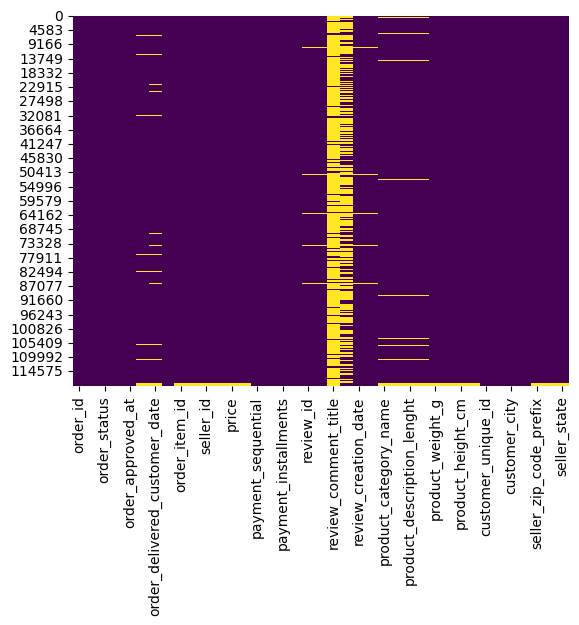

In [11]:
sns.heatmap(df_merge.isnull(), cbar=False, cmap='viridis')
plt.show()

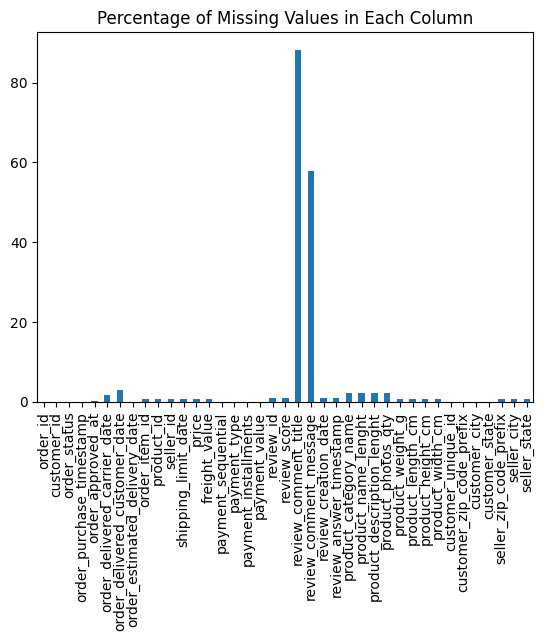

In [14]:
# Calculate the percentage of missing values in each column
missing_percentage = (df_merge.isnull().sum() / len(df_merge)) * 100

# Plot a bar chart
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values in Each Column')
plt.show()


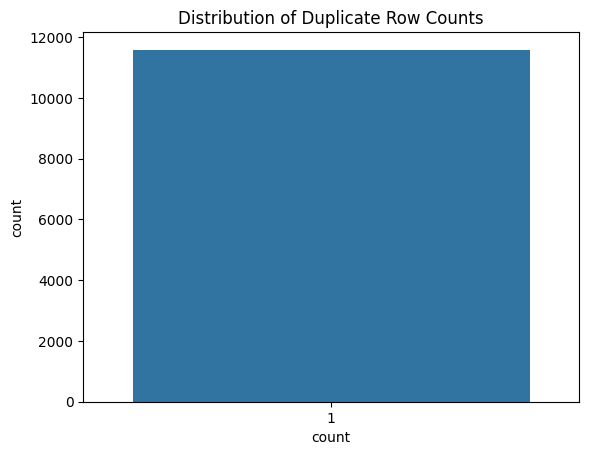

In [16]:
# Count the number of occurrences of each row
row_counts = df_merge.groupby(df_merge.columns.tolist()).size().reset_index(name='count')

# Plot a count plot
sns.countplot(x='count', data=row_counts)
plt.title('Distribution of Duplicate Row Counts')
plt.show()
